# はずれ値のスコア化
<a name="はずれ値のスコア"></a>


異常検知は異常な値を観測した瞬間に異常を検知して欲しいが、そのためには正常なデータが何かを把握する必要がある。    
正常なデータがどのように表れるかを把握すれば、異常なデータはそれとは異なるようなデータであれば異常と判断できる。   
正常なデータはどのように判断すれば良いか?
> 正常なデータを把握するために確率分布を使う。   
> 確率分布を把握するとすべてのデータを把握しなくても正常なデータが取りうるだろう値を予測できる点が良い点。

何らかの観測量に対する確率分布が求まったとして、異常ないし変化の度合いを定量的に示す方法として、シャノン情報量の差分を使う。   
> 理由は、異常度が高い(起こりにくい現象)なら得られる情報量は高いから。   

シャノン情報量$S({\bf x})$は、確率分布$p({\bf x})$を使って次のように表せる。

\begin{eqnarray}
    S({\bf x}) = -ln\, p({\bf x})
\end{eqnarray}

二つのデータ$D_{norm}$と${D_{anom}}$が得られた時のシャノン情報量の差分は、

\begin{eqnarray}
    \Delta S({\bf x}) = -ln\, \frac{p({\bf x}|D_{norm})}{p({\bf x}|D_{anom})}
\end{eqnarray}

と表せる。   

また、ネイマンピアソンの決定則から単発の異常度を定義してもよい。   
単発の異常度$a(x)$は、$a(x)= -ln\,r(x)$ と表せる。ただし、$r(x)\equiv p(x)/q(x)$。  


ここまでのまとめ、**情報量差分は確率密度の比を計算することで得られる。**

## 変化点検知のアルゴリズム
<a name="変化点検知のアルゴリズム"></a>

区分空間して累積和法による変化点検知を採用する。   
単一標本の異常度を計算するだけでは、系の状態変化の検知はできない。   
やりたいことは、**単発で突発的に異常値が得られたというよりは、継続して異常値が発生していること(異常状態)を検知すること**。

例えば、~~品質管理・製造業に於いて、ある製造ラインの製品不具合を時々刻々と監視しているとする。~~    
~~製造ラインは、様々な要因に作用されるため、極端な不良製品が製造されることがある。~~   
~~製造ラインの異常状態を検知するには、継続して不良製品が製造されることを検知する必要がある。~~ 
~~モード解析で例えると、製造ラインは"構造物の物理系"に相当し、製品は"モーダルパラメタ"に相当する。(不良製品は、位相ズレ、振幅現象や振動数現象と解釈)~~

化学プラントの反応炉の中での特定の薬品の濃度を監視していたとする。   
流体である化学物質は、反応炉を出入りがあるので、局所的に濃度が高かったりする。   
この場合は、観測一回ごとに一つ一つ異常度を計算する監視は不適切。   
単発で突発的に異常値が得られたというよりは、継続して異常値が発生していること(異常状態)を検知すること。   
継続して異常値が発生していることを検知することで、反応炉の異常を検知する。   
モード解析で例えると、反応炉は"構想物の物理系"に相当し、薬品濃度はモーダルパラメタに相当する。
>ホテリング法~~やSIAT~~は、観測一回ごとに一つ一つ異常度を計算するタイプ


**累積和法**は、まず何らかの手法で単発の異常度$a({\bf x}^{t})$を求める。(${\bf x}^{t}$は時刻tにおける観測値。)      
もしこの量が継続的に0より大きければ、異常状態のほうが確からしいと考える。   
したがって、累積和(CUSUM)は、漸化式の形で次のように表せる。

\begin{eqnarray}
    {CUSUM}^{(t)} = \left[ {CUSUM}^{(t-1)} + a({\bf x}^{t}) \right]
\end{eqnarray}

$[\cdot]$は、カッコ中が正なら何もせず、負ならば0に変える演算子とする。     
こうすることで、異常値が継続して発生していれば、CUSUMは常に増加する。   

本アルゴリズムのCUSUMは、正常時の異常度の分布が、あらかじめ決めた閾値を超えたら加算、超えなかったら減算をして、平均して0になるようにする。
例えば、正常時の異常度の分布上5%を閾値とすると、

\begin{eqnarray}
    {CUSUM}^{(t)} = {CUSUM}^{(t-1)} + 
    \left\{
    \begin{array}{l}
        0.95 \,\, if \,\, a({\bf x}^{t}) \,\, > \,\, thre \\ 
        -0.05 \,\, if \,\, a({\bf x}^{t}) \,\, \leq \,\, thre
    \end{array}
    \right.
\end{eqnarray}


## 密度比推定によるはずれ値検知

$p(x)$と$q(x)$から生成されたデータをつかって、** q(x)に含まれる"はずれ値"を検知したい**   

手順   
1. $p(x)$と$q(x)$から生成されたデータを使って、p(x)/q(x)の比を推定し、得られたデータの値に対しての密度比関数を作る。    
2. q(x)のデータを密度比関数に当てはめて、密度比$r(x)$が低くなる(異常度$-ln\,r(x)$が高くなる)箇所をはずれ値とする。    
補足: どれくらい異常度が高ければ異常とすればよいのか?

異常時に得られる確率密度関数: $\tilde{p}(x)$   
$q(x)$から生成されるデータのほとんどが$p(x)$に従い、ごくわずか$\tilde{p}(x)$に従う。    
混ざる割合を$\alpha$とすると、$q(x) = (1-\alpha)p(x)+\alpha \tilde{p}(x)$ と書ける。   

\begin{eqnarray}
    a(x) &=& -ln\,r(x)　　ただし、r(x)\equiv p(x)/q(x) \\  
    a(x) &=& -ln \frac{p(x)}{(1-\alpha)p(x)+\alpha \tilde{p}(x)} \\
         &=& ln\left( (1-\alpha)+\alpha \frac{\tilde{p}(x)}{p(x)} \right) > ln(1-\alpha) \simeq -\alpha \,\,\,\, (\alpha << 1)
\end{eqnarray}   

異常値の下限は、$-\alpha$   
どれくらい異常度が高ければ異常とすればよいのか　 
$\rightarrow$ 正常時の異常度分布を使って正常状態の異常度の最大値を決め, 最大値から上$\alpha$×100 %を閾値とすれば, よい(はず)

## 参考文献

外れ値検出   
サンプルxが外れ値の場合には確率密度比p(x)/q(x)が小さくなることを利用して外れ値を検出 (p(x):外れ値を含まないデータの確率密度関数、q(x): 外れ値を含んだデータの確率密度関数)。   

Hido+, Statistical outlier detection using direct density ratio estimation, Knowledge and Information Systems, vol.26, no.2, pp.309-336, 2011.    
Smola+, Relative Novelty Detection, AISTATS 2009, pp.536-543.     

変化点検出   
確率密度比推定を用いて推定したカルバックライブラー情報量等(KL(p_t(x)||q_t(x)))の指標を用いて変化点を検出 (p_t(x): 時間tの直前のデータの確率密度関数、q_t(x): 時間tの直後のデータの確率密度関数)。   
変化点でない場合にはp_t(x)とq_t(x)が同じとなり、KL(p_t(x)||q_t(x)) = 0となる。一方で変化点の場合には、KL(p_t(x)||q_t(x)) > 0となる。   

Kawahara+, Change-point detection based on direct density-ratio estimation, Statistical Analysis and Data Mining, Vol.5, No.2, pp.114-127.    
Song+, Change-Point Detection in Time-Series Data by Relative Density-Ratio Estimation, arXiv:1203.0453v1.    

# テスト

In [1]:
import sys
sys.path.append('src/')
import numpy as np
import random as rand
import scipy.stats as scipy_stats
import Direct_density_ratio_estimation_uLSIF_python as density
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_classification, make_circles, make_moons
import scipy
import scipy.stats

## 正規分布で密度比の振る舞いを確かめる。

In [4]:
#
N_norm = 300
N_anom = 100

#基本は、norm/anomで密度比を学習する。
#異常になるにしたがって、分散が大きくなる場合
#この場合、正常時の分布の裾(正常時ではめったに現れない値の領域)のほうに異常状態の値が頻出する。
#したがって、異常状態の場合、密度比が低くなる領域に値が頻出するため、上側累積和で検知可能。norm/(norm+anom)の密度比でも可能
m = [10,10]
s = [0.8,2]

# # 異常になるにしたがって、中央がずれる場合
# # この場合も正常時の分布の裾(正常時ではめったに現れない値の領域)のほうに異常状態の値が頻出する。
# #したがって、異常状態の場合、密度比が低くなる領域に値が頻出するため、上側累積和で検知可能。norm/(norm+anom)の密度比でも可能
# m = [10,15]
# s = [2,2]

# #異常になるにしたがって、分散が小さくなる場合
# #この場合も正常時の分布の最頻値に異常状態の値が頻出する。
# #したがって、統計的に正常状態の分布より最頻するくらいまでデータがたまらないと検出が困難。また、norm / (norm + anom)では、上側累積和をつかった検出が困難
# #下側累積和であると検知可能。(正常時最頻のところに、値が現れ安くなる。= 密度比が高いところにたくさん値が来る。) あんまり使わない可能性がある。
# m = [10,10]
# s = [2, 0.5]

X_norm = np.random.normal(size=N_norm,loc=m[0],scale=s[0])
X_anom = np.random.normal(size=N_anom,loc=m[1],scale=s[1])

Tot = np.r_[X_norm,X_anom]
dens = density.Density_ratio_estimation(X_norm,Tot) #norm / (norm+anom)
#dens = Density_ratio(X_norm,X_anom) #norm / anom
dens.run()

w_hat = np.asanyarray(dens.calculate_density_ratio(Tot))
anom_score = -np.log(w_hat)

anom_percentile = 5 
w_hat_norm = np.asanyarray(dens.calculate_density_ratio(X_norm)) 
anom_score_norm = -np.log(w_hat_norm) 

thresh_upper = np.percentile(anom_score_norm, 100.-anom_percentile)#上側累積和 threshold :正常時の異常度の上側5%以上となるanom_scoreの閾値を設定
cumsum_upper = np.cumsum(list(map(lambda x: 1-anom_percentile/100. if x > thresh_upper else -anom_percentile/100., anom_score))) 

thresh_lower = np.percentile(anom_score_norm,anom_percentile)#下側累積和 threshold :正常時の異常度の下側5%以上となるanom_scoreの閾値を設定
cumsum_lower = np.cumsum(list(map(lambda x: 1-anom_percentile/100. if x < thresh_lower else -anom_percentile/100., anom_score))) 



start calculate density ratio using uLSIF.
search sigma and lambda
sigma = 0.0010, lambda = 0.0010, score = -0.0000
sigma = 0.0032, lambda = 0.0010, score = -0.0005
sigma = 0.0100, lambda = 0.0010, score = -0.0257
sigma = 0.0316, lambda = 0.0010, score = -0.1587
sigma = 0.1000, lambda = 0.0010, score = -0.3885
sigma = 0.1000, lambda = 0.0032, score = -0.3943
sigma = 0.3162, lambda = 0.0032, score = -0.4557
sigma = 0.3162, lambda = 0.0100, score = -0.4681
sigma = 1.0000, lambda = 0.1000, score = -0.4736
sigma = 1.0000, lambda = 0.3162, score = -0.4822
sigma = 1.0000, lambda = 1.0000, score = -0.4863
sigma = 1.0000, lambda = 3.1623, score = -0.4893
sigma = 3.1623, lambda = 0.3162, score = -0.4982
sigma = 3.1623, lambda = 1.0000, score = -0.4998
sigma = 10.0000, lambda = 0.1000, score = -0.5000
optimal sigma = 10.0000, lamda = 0.1000
alpha optimization
alpha optimization end
start calculate density ratio using uLSIF.


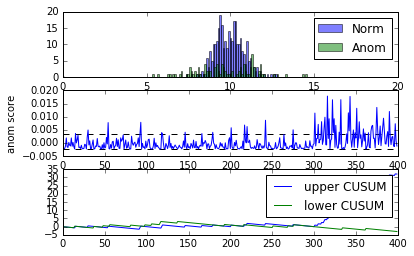

In [5]:
plt.figure()
plt.subplot(311)
edges = np.linspace(0,20,200)
plt.hist(X_norm,bins=edges,alpha=0.5,label='Norm')
plt.hist(X_anom,bins=edges,alpha=0.5,label='Anom')
plt.legend()

plt.subplot(312)
plt.plot(anom_score)
plt.hlines(thresh_upper,0,len(anom_score),linestyles='--')
plt.hlines(thresh_lower,0,len(anom_score),linestyles='--')
plt.ylabel('anom score')

plt.subplot(313)
plt.plot(cumsum_upper,label='upper CUSUM')
plt.plot(cumsum_lower,label='lower CUSUM')
plt.legend()
plt.show()


この密度比推定のROC曲線などがかける。

ASA: 異常標本精度 = (全異常標本の中で、正しく異常と判定)/(実際に異常である標本の総数)   
NSA: 正常標本精度 = (全異常標本の中で、正しく正常と判定)/(実際に正常である標本の総数)    
ROC: 受信者需要曲線 ASA vs 1-NSA をプロットした曲線   

AUC: ROC曲線の下部面積　分類器の精度指標

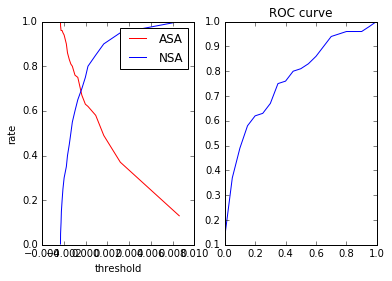

AUC:0.76595


In [6]:
#
w_hat_norm = np.asanyarray(dens.calculate_density_ratio(X_norm)) 
anom_score_norm = -np.log(w_hat_norm) 
w_hat_test = np.asanyarray(dens.calculate_density_ratio(X_anom))
score = -np.log(w_hat_test)
FPR = []
ASA = []
NSA = []
thr = []
for percentile in range(0,105,5):
    thresh_upper = np.percentile(anom_score_norm, 100.-percentile)#上側累積和 threshold :正常時の異常度の上側5%以上となるanom_scoreの閾値を設定
    FPR.append(np.sum(score <= thresh_upper)/float(N_anom))
    ASA.append(np.sum(score > thresh_upper)/float(N_anom))
    NSA.append(np.sum(anom_score_norm <= thresh_upper)/float(N_norm))
    thr.append(thresh_upper)
plt.figure()
plt.subplot(121)
plt.plot(thr,ASA,'r',label='ASA')
plt.plot(thr,NSA,'b',label='NSA')
plt.xlabel('threshold')
plt.ylabel('rate')
plt.legend()

plt.subplot(122)
plt.title(u'ROC curve')
plt.plot(1-np.array(NSA),np.array(ASA))
plt.show()
AUC = [0.5*(ASA[i]+ASA[i+1])*((1-np.array(NSA))[i+1]-(1-np.array(NSA))[i]) for i in range(len(ASA)-1)]
print(u'AUC:{AUC}'.format(**{'AUC':np.sum(AUC)}))

## 超幾何分布の異常検知

あるサンプル内に1または0と数字が書かれた100枚のカードが、80:20の割合で入っている。   
そこから20枚取り出したときに1を取り出せた枚数を記録する操作を  
1000回試行した時の分布。

In [7]:
N_norm = 100
N_anom = 40
x_norm = np.random.hypergeometric(80,20,20,size=N_norm) 
y_anom = np.random.hypergeometric(60,40,20,size=N_anom)
Tot = np.r_[x_norm,y_anom]

/home/infra/.pyenv/versions/2.7.12/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


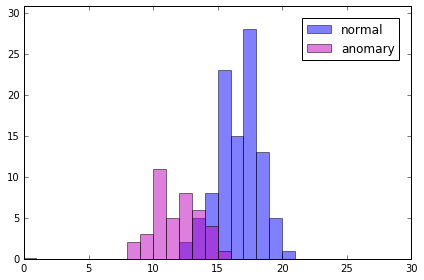

In [8]:
# 表示
fig = plt.figure()
ax = fig.add_subplot(111)
edges = np.arange(0,30,1)
a = ax.hist(x_norm, bins = edges, color='b', alpha = 0.5, label='normal')
b = ax.hist(y_anom, bins = edges, color='m', alpha = 0.5, label='anomary')
ylim = 1.1*np.max([a[0],b[0]])
ax.set_ylim(0,ylim)
ax.legend(fontsize = 12, bbox_to_anchor = (1,1), loc='upper right', borderaxespad = 1)
fig.show()
plt.tight_layout()

In [9]:
Test = density.Density_ratio_estimation(x_norm,Tot)
Test.run()

start calculate density ratio using uLSIF.
search sigma and lambda
sigma = 0.0010, lambda = 0.0010, score = -0.4196
sigma = 0.0010, lambda = 0.0032, score = -0.4202
sigma = 0.0010, lambda = 0.0100, score = -0.4220
sigma = 0.0010, lambda = 0.0316, score = -0.4262
sigma = 0.0010, lambda = 0.1000, score = -0.4320
sigma = 0.0010, lambda = 0.3162, score = -0.4351
sigma = 0.3162, lambda = 0.3162, score = -0.4351
sigma = 1.0000, lambda = 1.0000, score = -0.4414
sigma = 1.0000, lambda = 3.1623, score = -0.4624
sigma = 1.0000, lambda = 10.0000, score = -0.4668
sigma = 3.1623, lambda = 3.1623, score = -0.4971
sigma = 3.1623, lambda = 10.0000, score = -0.4985
sigma = 10.0000, lambda = 1.0000, score = -0.5000
optimal sigma = 10.0000, lamda = 1.0000
alpha optimization
alpha optimization end
start calculate density ratio using uLSIF.


CUMSUM計算

In [10]:
anom_percentile = 10 #正常時(異常データが正常データに比べて十分少ないとき)の推定した密度比の下側5%以下をエラーとする。(異常度の上側5%以上をエラーとする)例えば、学校のテストの点数が低い人下から5%をエラーと仮定する。
w_hat_norm = np.asanyarray(Test.calculate_density_ratio(x_norm)) #正常時の密度比　密度比の関数を使って、得られた特徴量の値(Vector)が、各entryの時にどの値かを計算する。
w_hat = np.asanyarray(Test.calculate_density_ratio(Tot))
anom_score_norm = -np.log(w_hat_norm) #密度比を情報エントロピーに変換
anom_score = -np.log(w_hat)
thresh = np.percentile(anom_score_norm,100.-anom_percentile)# threshold :正常時の異常度の上側5%以上となるanom_scoreの閾値を設定
cumsum_anom = np.cumsum(list(map(lambda x: 1-anom_percentile/100. if x > thresh else -anom_percentile/100., anom_score))) #異常が現れた回数を重み付けして足していく。正常時のときには期待値が0になるように調整。

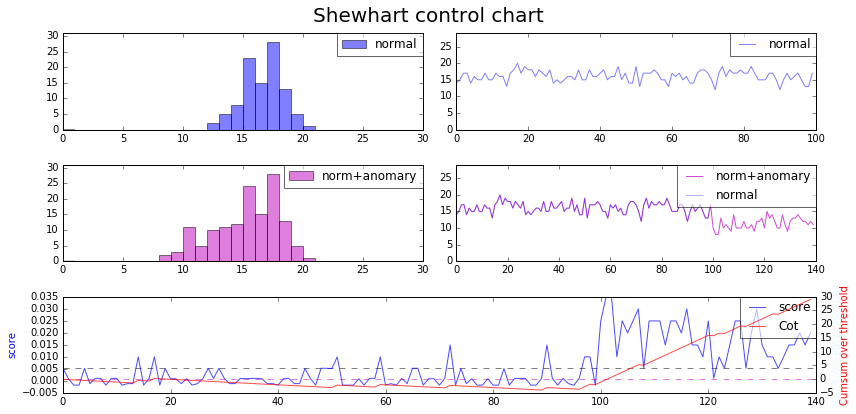

In [11]:
fig = plt.figure(figsize=(12,6))
ax00 = plt.subplot2grid((3,2),(0,0))
ax01 = plt.subplot2grid((3,2),(0,1))
ax10 = plt.subplot2grid((3,2),(1,0))
ax11 = plt.subplot2grid((3,2),(1,1))
ax20 = plt.subplot2grid((3,2),(2,0),colspan=2)

edges = np.arange(0,30,1)
a=ax00.hist(Test.get_x(),bins=edges, color='b', alpha = 0.5, label='normal')
b=ax10.hist(Test.get_y(), bins = edges, color='m', alpha = 0.5, label='norm+anomary')
ylim = 1.1*np.max([a[0],b[0]])
ax00.set_ylim(0,ylim)
ax10.set_ylim(0,ylim)
ax00.legend(fontsize = 12, bbox_to_anchor = (1,1), loc='upper right', borderaxespad = 0).get_frame().set_alpha(0.6)
ax10.legend(fontsize = 12, bbox_to_anchor = (1,1), loc='upper right', borderaxespad = 0).get_frame().set_alpha(0.6)

ax01.plot(Test.get_x(), color = 'b', alpha = 0.5 , label = 'normal')
ax01.set_ylim(np.min(edges),np.max(edges))
ax11.plot(Test.get_y(), color = 'm', alpha = 0.7 , label = 'norm+anomary')
ax11.plot(Test.get_x(), color = 'b', alpha = 0.3 , label = 'normal')
ax11.set_ylim(np.min(edges),np.max(edges))
ax01.legend(fontsize = 12, bbox_to_anchor = (1,1), loc='upper right', borderaxespad = 0).get_frame().set_alpha(0.6)
ax11.legend(fontsize = 12, bbox_to_anchor = (1,1), loc='upper right', borderaxespad = 0).get_frame().set_alpha(0.6)

ax20_1 = ax20
ax20_2 = ax20.twinx()

ax20_1.hlines(y=thresh,xmin=0,xmax=len(anom_score),colors='k',linestyles='--',alpha=0.5)
ax20_2.hlines(y=0,xmin=0,xmax=len(anom_score),colors='m',linestyles='--',alpha=0.5)
p1 = ax20_1.plot(anom_score, alpha=0.7, label = 'score', color='b')
p2 = ax20_2.plot(cumsum_anom,alpha=0.7, label = 'Cot', color='r')
p = p1+p2
ax20_1.legend(p,[i.get_label() for i in p],
              fontsize=12, bbox_to_anchor=(1,1),
              loc='upper right',borderaxespad=0).get_frame().set_alpha(0.6)
ax20_1.set_ylabel('score',color='b')
ax20_2.set_ylabel('Cumsum over threshold',color='r')

fig.suptitle('Shewhart control chart',fontsize = 20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## ２次元分布

人間の頭で理解できる次元が高々2次元であるため、二次元で検証する。

### 多変量正規分

In [12]:
NUM_MIXTURE_COMPONENTS = 2
NUM_DIMENSIONS = 2
def create_data(num_samples, seed = None):
    if seed is not None:
        np.random.seed(seed)
    weights = np.random.random(NUM_MIXTURE_COMPONENTS)
    weights = (weights/ weights.sum()).tolist()
    
    feature_vectors, labels = make_classification(n_samples=num_samples,
                                                  n_features=NUM_DIMENSIONS, 
                                                  n_redundant=0,
                                                  n_classes=NUM_MIXTURE_COMPONENTS, 
                                                  n_clusters_per_class=1,
                                                  weights=weights)
   # plt.scatter(feature_vectors[:,0],feature_vectors[:,1],marker='o')
   # plt.show()
    return feature_vectors

Normal:500 event   
Anom  :100 event

In [13]:
vectors_norm = create_data(1000,87)

In [14]:
vectors_anom = create_data(500,106)

In [15]:
Tot = np.r_[vectors_norm,vectors_anom]
Test = density.Density_ratio_estimation(vectors_norm,Tot)
Test.run()

start calculate density ratio using uLSIF.
search sigma and lambda
sigma = 0.0010, lambda = 0.0010, score = -0.0000
sigma = 0.0010, lambda = 10.0000, score = -0.0000
sigma = 0.0032, lambda = 10.0000, score = -0.0000
sigma = 0.0100, lambda = 0.0010, score = -0.0000
sigma = 0.0316, lambda = 0.0010, score = -0.0018
sigma = 0.1000, lambda = 0.0010, score = -0.1004
sigma = 0.3162, lambda = 0.0010, score = -0.4194
sigma = 0.3162, lambda = 0.0032, score = -0.4272
sigma = 1.0000, lambda = 0.1000, score = -0.4406
sigma = 1.0000, lambda = 0.3162, score = -0.4506
sigma = 1.0000, lambda = 1.0000, score = -0.4603
sigma = 1.0000, lambda = 3.1623, score = -0.4719
sigma = 3.1623, lambda = 1.0000, score = -0.4983
sigma = 3.1623, lambda = 3.1623, score = -0.4993
sigma = 10.0000, lambda = 0.3162, score = -0.5000
optimal sigma = 10.0000, lamda = 0.3162
alpha optimization
alpha optimization end
start calculate density ratio using uLSIF.


In [16]:
anom_percentile = 0.5 #正常時(異常データが正常データに比べて十分少ないとき)の推定した密度比の下側5%以下をエラーとする。例えば、学校のテストの点数が低い人下から5%をエラーと仮定する。
w_hat_norm = np.asanyarray(Test.calculate_density_ratio(vectors_norm)) #正常時の密度比
w_hat = np.asanyarray(Test.calculate_density_ratio(Tot))
anom_score_norm = -np.log(w_hat_norm) #密度比を情報エントロピーに変換
anom_score = -np.log(w_hat)
thresh = np.percentile(anom_score_norm,100.-anom_percentile)
cumsum_anom = np.cumsum(list(map(lambda x: 1-anom_percentile/100. if x > thresh else -anom_percentile/100., anom_score))) #異常が現れた回数を重み付けして足していく。正常時のときには平均が0になるように調整。

In [17]:
import seaborn as sns
import pandas as pd

In [18]:
df1 = pd.DataFrame(Test.get_x(),columns=['feature1','feature2'])
df1['State'] = ['Normal' for i in range(len(df1))]
df2 = pd.DataFrame(Test.get_y(),columns=['feature1','feature2'])
df2['State'] = ['Normal+Anom' for i in range(len(df2))]
df = df1.append(df2)

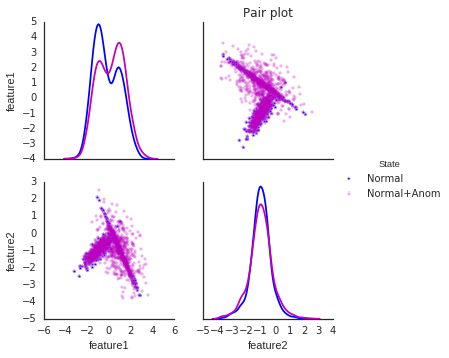

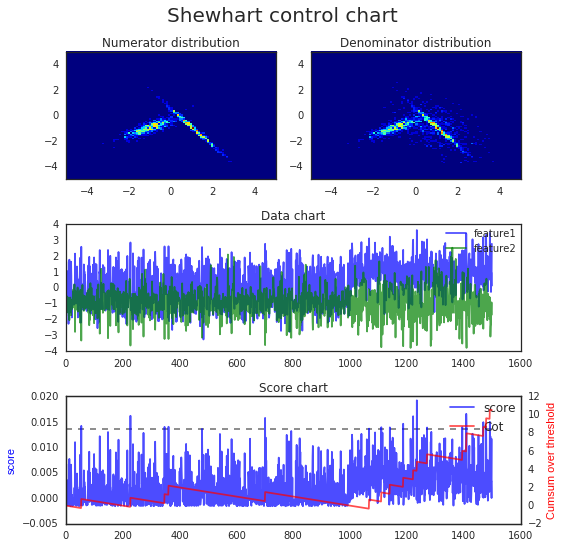

In [19]:
#
sns.set_style('white')
fig = plt.figure()

sns.pairplot(df,
             hue="State",
             markers=["*","+"],
             palette={"Normal": "b", "Normal+Anom": "m"},
             vars=['feature1','feature2'],
             diag_kind = 'kde')
sns.plt.title('Pair plot')
fig.show()

fig = plt.figure(figsize=(8,8))
ax00 = plt.subplot2grid((3,2),(0,0))
ax01 = plt.subplot2grid((3,2),(0,1))
ax10 = plt.subplot2grid((3,2),(1,0),colspan=2)
ax20 = plt.subplot2grid((3,2),(2,0),colspan=2)

edges = np.linspace(-5,5,100)
ax00.hist2d(Test.get_x()[:,0],Test.get_x()[:,1],bins=[edges,edges],cmap=plt.get_cmap('jet'),normed=True)
ax01.hist2d(Test.get_y()[:,0],Test.get_y()[:,1],bins=[edges,edges],cmap=plt.get_cmap('jet'),normed=True)
ax00.set_title('Numerator distribution')
ax01.set_title('Denominator distribution')

ax10.plot(Test.get_y()[:,0],color='b',alpha=0.7,label='feature1')
ax10.plot(Test.get_y()[:,1],color='g',alpha=0.7,label='feature2')
ax10.legend(bbox_to_anchor=(1,1),loc='upper right',borderaxespad=0).get_frame().set_alpha(0.6)
ax10.set_title('Data chart')

ax20_1 = ax20
ax20_2 = ax20.twinx()
ax20_1.hlines(y=thresh,xmin=0,xmax=len(anom_score),colors='k',linestyles='--',alpha=0.5)
p1 = ax20_1.plot(anom_score, alpha=0.7, label = 'score', color='b')
p2 = ax20_2.plot(cumsum_anom,alpha=0.7, label = 'Cot', color='r')
p = p1+p2
ax20_1.legend(p,[i.get_label() for i in p],
              fontsize=12, bbox_to_anchor=(1,1),
              loc='upper right',borderaxespad=0).get_frame().set_alpha(0.6)
ax20_1.set_ylabel('score',color='b')
ax20_2.set_ylabel('Cumsum over threshold',color='r')
ax20.set_title('Score chart')

fig.suptitle('Shewhart control chart',fontsize = 20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### circle

Normal:500 event   
Anom  :100 event

In [20]:
vectors_norm, y = make_circles(noise=0.05,factor=0.2,n_samples=500)
vectors_anom, y = make_moons(noise=0.05,random_state=0,n_samples=100)
Tot = np.r_[vectors_norm,vectors_anom]
Test = density.Density_ratio_estimation(vectors_norm,Tot)
Test.run()

start calculate density ratio using uLSIF.
search sigma and lambda
sigma = 0.0010, lambda = 0.0010, score = -0.0000
sigma = 0.0032, lambda = 0.0010, score = -0.0000
sigma = 0.0100, lambda = 0.0010, score = -0.0000
sigma = 0.0316, lambda = 0.0010, score = -0.0066
sigma = 0.1000, lambda = 0.0010, score = -0.2135
sigma = 0.3162, lambda = 0.0010, score = -0.3887
sigma = 0.3162, lambda = 0.0032, score = -0.4578
sigma = 0.3162, lambda = 0.0100, score = -0.4772
sigma = 1.0000, lambda = 0.1000, score = -0.4882
sigma = 1.0000, lambda = 0.3162, score = -0.4904
sigma = 1.0000, lambda = 1.0000, score = -0.4915
sigma = 3.1623, lambda = 0.3162, score = -0.4999
sigma = 3.1623, lambda = 1.0000, score = -0.4999
sigma = 10.0000, lambda = 0.0316, score = -0.4999
sigma = 10.0000, lambda = 0.1000, score = -0.5000
optimal sigma = 10.0000, lamda = 0.1000
alpha optimization
alpha optimization end
start calculate density ratio using uLSIF.


In [21]:
anom_percentile = 10 #正常時(異常データが正常データに比べて十分少ないとき)の推定した密度比の下側5%以下をエラーとする。例えば、学校のテストの点数が低い人下から5%をエラーと仮定する。
w_hat_norm = np.asanyarray(Test.calculate_density_ratio(vectors_norm)) #正常時の密度比
w_hat = np.asanyarray(Test.calculate_density_ratio(Tot))
anom_score_norm = -np.log(w_hat_norm) #密度比を情報エントロピーに変換
anom_score = -np.log(w_hat)
thresh = np.percentile(anom_score_norm,100.-anom_percentile)
cumsum_anom = np.cumsum(list(map(lambda x: 1-anom_percentile/100. if x > thresh else -anom_percentile/100., anom_score))) #異常が現れた回数を重み付けして足していく。正常時のときには平均が0になるように調整。

In [22]:
df1 = pd.DataFrame(Test.get_x(),columns=['feature1','feature2'])
df1['State'] = ['Normal' for i in range(len(df1))]
df2 = pd.DataFrame(Test.get_y(),columns=['feature1','feature2'])
df2['State'] = ['Normal+Anom' for i in range(len(df2))]
df = df1.append(df2)

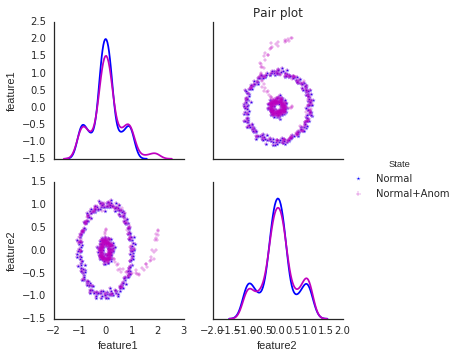

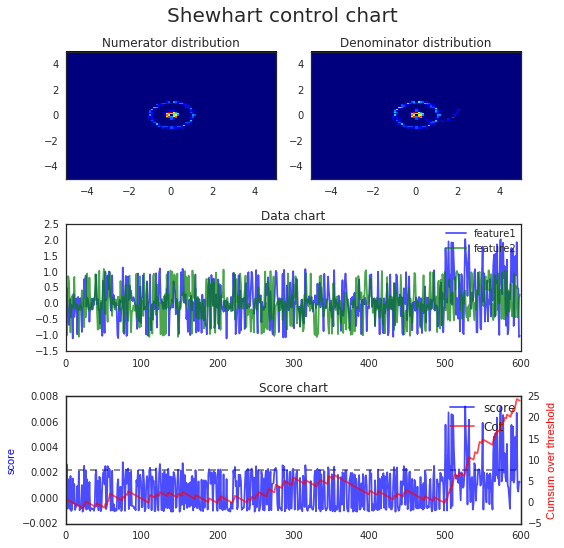

In [23]:
#
sns.set_style('white')
fig = plt.figure()

sns.pairplot(df,
             hue="State",
             markers=["*","+"],
             palette={"Normal": "b", "Normal+Anom": "m"},
             vars=['feature1','feature2'],
             diag_kind = 'kde')
sns.plt.title('Pair plot')
fig.show()

fig = plt.figure(figsize=(8,8))
ax00 = plt.subplot2grid((3,2),(0,0))
ax01 = plt.subplot2grid((3,2),(0,1))
ax10 = plt.subplot2grid((3,2),(1,0),colspan=2)
ax20 = plt.subplot2grid((3,2),(2,0),colspan=2)

edges = np.linspace(-5,5,100)
ax00.hist2d(Test.get_x()[:,0],Test.get_x()[:,1],bins=[edges,edges],cmap=plt.get_cmap('jet'),normed=True)
ax01.hist2d(Test.get_y()[:,0],Test.get_y()[:,1],bins=[edges,edges],cmap=plt.get_cmap('jet'),normed=True)
ax00.set_title('Numerator distribution')
ax01.set_title('Denominator distribution')

ax10.plot(Test.get_y()[:,0],color='b',alpha=0.7,label='feature1')
ax10.plot(Test.get_y()[:,1],color='g',alpha=0.7,label='feature2')
ax10.legend(bbox_to_anchor=(1,1),loc='upper right',borderaxespad=0).get_frame().set_alpha(0.6)
ax10.set_title('Data chart')

ax20_1 = ax20
ax20_2 = ax20.twinx()
ax20_1.hlines(y=thresh,xmin=0,xmax=len(anom_score),colors='k',linestyles='--',alpha=0.5)
p1 = ax20_1.plot(anom_score, alpha=0.7, label = 'score', color='b')
p2 = ax20_2.plot(cumsum_anom,alpha=0.7, label = 'Cot', color='r')
p = p1+p2
ax20_1.legend(p,[i.get_label() for i in p],
              fontsize=12, bbox_to_anchor=(1,1),
              loc='upper right',borderaxespad=0).get_frame().set_alpha(0.6)
ax20_1.set_ylabel('score',color='b')
ax20_2.set_ylabel('Cumsum over threshold',color='r')
ax20.set_title('Score chart')

fig.suptitle('Shewhart control chart',fontsize = 20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### もう少し複雑な状態検知

In [24]:
#もう少し難しい検知。高速回転-低速回転、中速回転-軸ブレ

# 訓練データの生成
np.random.seed(71)

cov_n = [[ 10,  0],
         [  0, 10]]
M = 2
m_n_1 = (10, 10)
m_n_2 = (20, 20)
n_data = 500

X_norm = np.empty((2*n_data, M))
X_norm[:n_data] = scipy.stats.multivariate_normal.rvs(mean=m_n_1, cov=cov_n, size=n_data)
X_norm[n_data:] = scipy.stats.multivariate_normal.rvs(mean=m_n_2, cov=cov_n, size=n_data)
N_norm = 2*n_data

# テストデータの生成
cov_n_1 = [[ 5,  0],
           [  0, 5]]
cov_n_2 = [[ .1,  0],
           [  0,.1]]

m_n_1 = (12.5, 12.5)
m_n_2 = (17.5, 17.5)
m_n_3 = (15, 15)
m_n_4 = (17.5, 12.5)
m_n_5 = (12.5, 17.5)

n_data_a = 200
N_anom = 5*n_data_a
X_anomaly = np.empty((n_data_a*5, M))
for i, m, c in zip(range(5), [m_n_1,m_n_2,m_n_3,m_n_4,m_n_5], [cov_n_1,cov_n_1,cov_n_2,cov_n_1,cov_n_1]):
    X_anomaly[n_data_a*i:n_data_a*(i+1)] = scipy.stats.multivariate_normal.rvs(mean=m, cov=c, size=n_data_a)

X = np.r_[X_norm, X_anomaly]

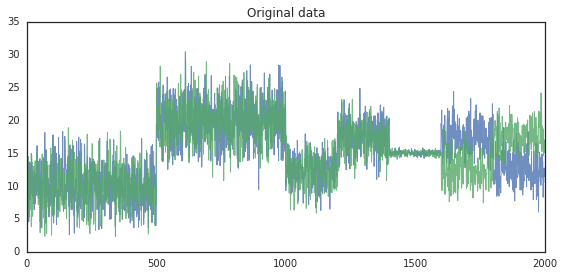

In [25]:
# データの可視化
plt.figure(figsize=(8,4))
plt.plot(X, lw=1, alpha=.8)
plt.xlim(0,len(X))

plt.title("Original data")
plt.tight_layout()
plt.show()

memo: SIATは、このような共変量シフトが起きた時の学習は困難。なぜならば、線形予測を使っているから。    

In [26]:
# 密度比推定を実行
result = density.Density_ratio_estimation(X_norm,X_anomaly)
result.run()

start calculate density ratio using uLSIF.
search sigma and lambda
sigma = 0.0010, lambda = 0.0010, score = 0.0000
sigma = 0.0010, lambda = 1.0000, score = -0.0000
sigma = 0.0100, lambda = 1.0000, score = -0.0000
sigma = 0.0316, lambda = 0.0010, score = -0.0000
sigma = 0.1000, lambda = 0.0010, score = -0.0026
sigma = 0.3162, lambda = 0.0010, score = -0.2942
sigma = 1.0000, lambda = 0.0100, score = -2.6919
optimal sigma = 1.0000, lamda = 0.0100
alpha optimization
alpha optimization end
start calculate density ratio using uLSIF.


密度比の生プロットを見てみる。

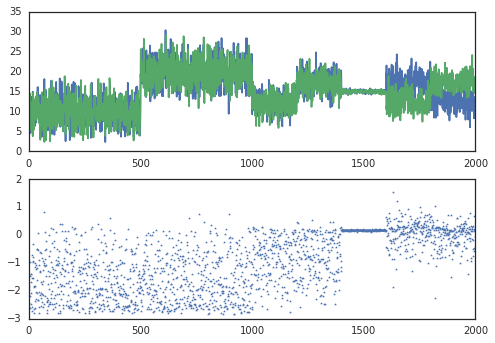

In [27]:
#
w_hat = np.asanyarray(result.calculate_density_ratio(X))
plt.figure()
plt.subplot(211)
plt.plot(X)
plt.subplot(212)
plt.plot(-np.log(w_hat),'*',markersize=3)
plt.show()

In [28]:
#密度比異常度計算
w_hat = np.asanyarray(result.calculate_density_ratio(X))
anom_score = -np.log(w_hat)
# 異常度閾値
anom_percentile = 0.5 # 推定した密度比の下側5%以下を異常とする
# 訓練データのうち、指定したパーセンタイル以下を異常とする閾値を設定
w_hat_norm = result.calculate_density_ratio(result.get_x())
anom_score_norm = -np.log(w_hat_norm)
thresh = np.percentile(anom_score_norm, 100.-anom_percentile)
cumsum_anom = np.cumsum(list(map(lambda x: 1-anom_percentile/100. if x > thresh else -anom_percentile/100., anom_score)))

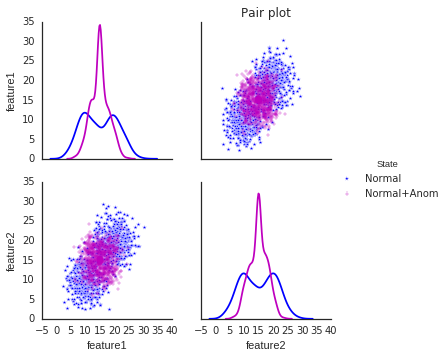

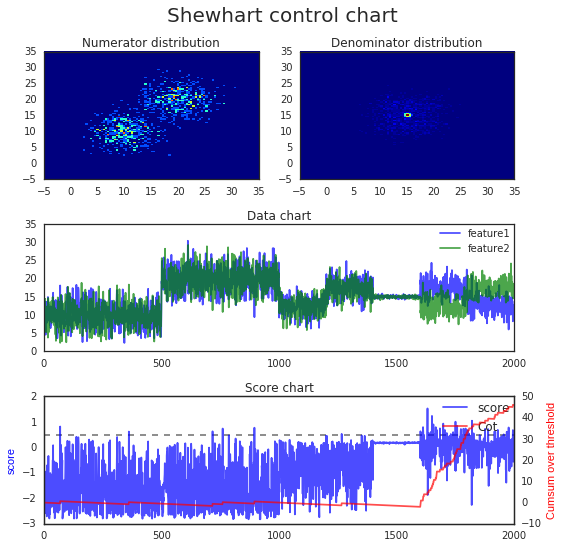

In [29]:
# 元データと異常度の関係性をグラフ化
df1 = pd.DataFrame(result.get_x(),columns=['feature1','feature2'])
df1['State'] = ['Normal' for i in range(len(df1))]
df2 = pd.DataFrame(result.get_y(),columns=['feature1','feature2'])
df2['State'] = ['Normal+Anom' for i in range(len(df2))]
df = df1.append(df2)

sns.set_style('white')
fig = plt.figure()

sns.pairplot(df,
             hue="State",
             markers=["*","+"],
             palette={"Normal": "b", "Normal+Anom": "m"},
             vars=['feature1','feature2'],
             diag_kind = 'kde')
sns.plt.title('Pair plot')
fig.show()

fig = plt.figure(figsize=(8,8))
ax00 = plt.subplot2grid((3,2),(0,0))
ax01 = plt.subplot2grid((3,2),(0,1))
ax10 = plt.subplot2grid((3,2),(1,0),colspan=2)
ax20 = plt.subplot2grid((3,2),(2,0),colspan=2)

edges = np.linspace(-5,35,100)
ax00.hist2d(result.get_x()[:,0],result.get_x()[:,1],bins=[edges,edges],cmap=plt.get_cmap('jet'),normed=True)
ax01.hist2d(result.get_y()[:,0],result.get_y()[:,1],bins=[edges,edges],cmap=plt.get_cmap('jet'),normed=True)
ax00.set_title('Numerator distribution')
ax01.set_title('Denominator distribution')

ax10.plot(np.r_[result.get_x()[:,0],result.get_y()[:,0]],color='b',alpha=0.7,label='feature1')
ax10.plot(np.r_[result.get_x()[:,1],result.get_y()[:,1]],color='g',alpha=0.7,label='feature2')
ax10.legend(bbox_to_anchor=(1,1),loc='upper right',borderaxespad=0).get_frame().set_alpha(0.6)
ax10.set_title('Data chart')

ax20_1 = ax20
ax20_2 = ax20.twinx()
ax20_1.hlines(y=thresh,xmin=0,xmax=len(anom_score),colors='k',linestyles='--',alpha=0.5)
p1 = ax20_1.plot(anom_score, alpha=0.7, label = 'score', color='b')
p2 = ax20_2.plot(cumsum_anom,alpha=0.7, label = 'Cot', color='r')
p = p1+p2
ax20_1.legend(p,[i.get_label() for i in p],
              fontsize=12, bbox_to_anchor=(1,1),
              loc='upper right',borderaxespad=0).get_frame().set_alpha(0.6)
ax20_1.set_ylabel('score',color='b')
ax20_2.set_ylabel('Cumsum over threshold',color='r')
ax20.set_title('Score chart')

fig.suptitle('Shewhart control chart',fontsize = 20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 3次元分布

In [30]:
#3d
NUM_MIXTURE_COMPONENTS = 3
NUM_DIMENSIONS = 3
def create_data(num_samples, seed = None):
    if seed is not None:
        np.random.seed(seed)
    weights = np.random.random(NUM_MIXTURE_COMPONENTS)
    weights = (weights/ weights.sum()).tolist()
    
    feature_vectors, labels = make_classification(n_samples=num_samples,
                                                  n_features=NUM_DIMENSIONS, 
                                                  n_redundant=0,
                                                  n_classes=NUM_MIXTURE_COMPONENTS, 
                                                  n_clusters_per_class=1,
                                                  weights=weights)
   # plt.scatter(feature_vectors[:,0],feature_vectors[:,1],marker='o')
   # plt.show()
    return feature_vectors

In [31]:
feature_vec_norm = create_data(200,23)
feature_vec_anom = create_data(100,50)

In [32]:
Tot = np.r_[feature_vec_norm,feature_vec_anom]
Test = density.Density_ratio_estimation(feature_vec_norm,feature_vec_anom)
Test.run()

start calculate density ratio using uLSIF.
search sigma and lambda
sigma = 0.0010, lambda = 0.0010, score = 0.0000
sigma = 0.0010, lambda = 0.0316, score = -0.0000
sigma = 0.0316, lambda = 0.0316, score = -0.0000
sigma = 0.1000, lambda = 0.0010, score = -0.0013
sigma = 0.3162, lambda = 0.0010, score = -1.2967
optimal sigma = 0.3162, lamda = 0.0010
alpha optimization
alpha optimization end
start calculate density ratio using uLSIF.


In [33]:
#密度比推定
w_hat = np.asanyarray(Test.calculate_density_ratio(Tot))
anom_score = -np.log(w_hat)
# 異常度閾値
anom_percentile = 0.5 # 推定した密度比の下側5%以下を異常とする
# 訓練データのうち、指定したパーセンタイル以下を異常とする閾値を設定
w_hat_norm = Test.calculate_density_ratio(Test.get_x())
anom_score_norm = -np.log(w_hat_norm)
thresh = np.percentile(anom_score_norm, 100.-anom_percentile)

cumsum_anom = np.cumsum(list(map(lambda x: 1-anom_percentile/100. if x > thresh else -anom_percentile/100., anom_score)))

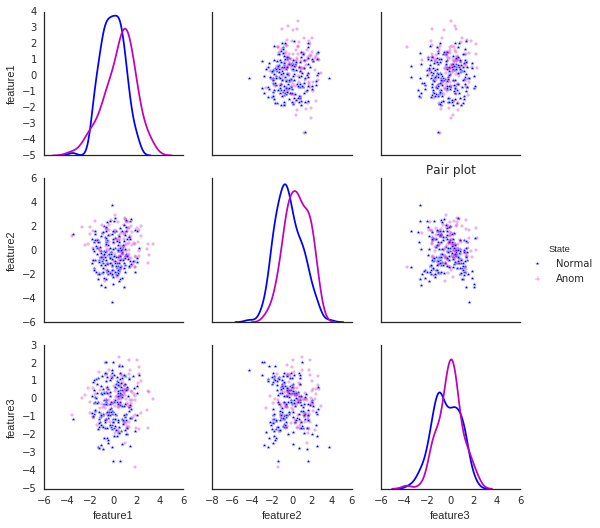

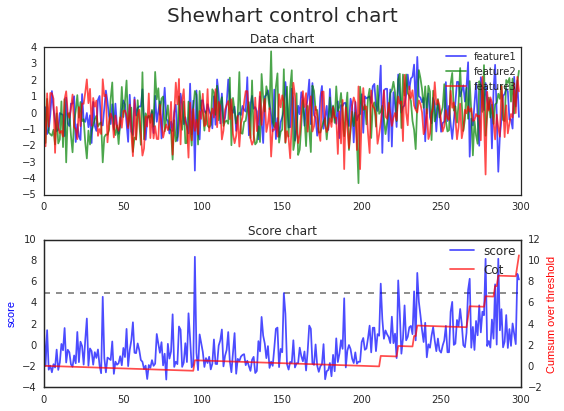

In [34]:
# 元データと異常度の関係性をグラフ化
df1 = pd.DataFrame(Test.get_x(),columns=['feature1','feature2','feature3'])
df1['State'] = ['Normal' for i in range(len(df1))]
df2 = pd.DataFrame(Test.get_y(),columns=['feature1','feature2','feature3'])
df2['State'] = ['Anom' for i in range(len(df2))]
df = df1.append(df2)

sns.set_style('white')
fig = plt.figure()

sns.pairplot(df,
             hue="State",
             markers=["*","+"],
             palette={"Normal": "b", "Anom": "m"},
             vars=['feature1','feature2','feature3'],
             diag_kind = 'kde')
sns.plt.title('Pair plot')
fig.show()

fig = plt.figure(figsize=(8,6))
ax10 = plt.subplot2grid((2,2),(0,0),colspan=2)
ax20 = plt.subplot2grid((2,2),(1,0),colspan=2)

ax10.plot(np.r_[Test.get_x()[:,0],Test.get_y()[:,0]],color='b',alpha=0.7,label='feature1')
ax10.plot(np.r_[Test.get_x()[:,1],Test.get_y()[:,1]],color='g',alpha=0.7,label='feature2')
ax10.plot(np.r_[Test.get_x()[:,2],Test.get_y()[:,2]],color='r',alpha=0.7,label='feature3')
ax10.legend(bbox_to_anchor=(1,1),loc='upper right',borderaxespad=0).get_frame().set_alpha(0.6)
ax10.set_title('Data chart')

ax20_1 = ax20
ax20_2 = ax20.twinx()
ax20_1.hlines(y=thresh,xmin=0,xmax=len(anom_score),colors='k',linestyles='--',alpha=0.5)
p1 = ax20_1.plot(anom_score, alpha=0.7, label = 'score', color='b')
p2 = ax20_2.plot(cumsum_anom,alpha=0.7, label = 'Cot', color='r')
p = p1+p2
ax20_1.legend(p,[i.get_label() for i in p],
              fontsize=12, bbox_to_anchor=(1,1),
              loc='upper right',borderaxespad=0).get_frame().set_alpha(0.6)
ax20_1.set_ylabel('score',color='b')
ax20_2.set_ylabel('Cumsum over threshold',color='r')
ax20.set_title('Score chart')

fig.suptitle('Shewhart control chart',fontsize = 20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()